In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 1. Load the dataset
df = pd.read_csv('/content/BP_BMI_Dataset.csv')  # Replace with actual file path

In [14]:
df.head()

,BMI,BP_Sy,BP_Di
0,31.7,164.0,66.0
1,21.5,126.0,74.0
2,18.1,136.0,71.0
3,23.7,146.0,82.0
4,38.9,120.0,83.0


In [15]:
df.rename(columns={
    'BP_Sy': 'Systolic Blood Pressure',
    'BP_Di': 'Diastolic Blood Pressure',
    'BMI': 'Body Mass Index'
}, inplace=True)

In [16]:
df.head()

,Body Mass Index,Systolic Blood Pressure,Diastolic Blood Pressure
0,31.7,164.0,66.0
1,21.5,126.0,74.0
2,18.1,136.0,71.0
3,23.7,146.0,82.0
4,38.9,120.0,83.0


In [17]:
df.shape

(7132, 3)

In [18]:
df.isna().sum()

,0
Body Mass Index,114
Systolic Blood Pressure,989
Diastolic Blood Pressure,989


In [19]:
df=df.dropna()

In [21]:
# Select relevant features
features = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Body Mass Index']
X = df[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 5. Split into training and testing sets
X_train, X_test = train_test_split(X_scaled , test_size=0.2, random_state=42)

# 6. Print shapes to verify
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4882, 3)
Testing set shape: (1221, 3)


# Clustering Starts

**K-means**

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different values of k
sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)

    sse.append(kmeans.inertia_)  # Sum of squared distances (Elbow method)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

Text(0, 0.5, 'SSE (Inertia)')

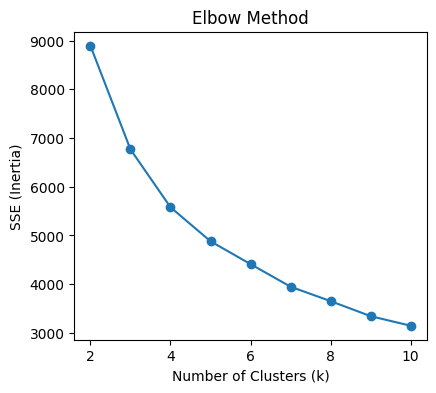

In [23]:
# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')

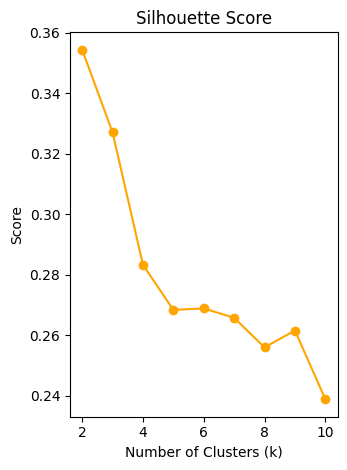

In [24]:
# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.cluster import KMeans

# Manually set k = 4
k = 4

# Fit KMeans model
kmeans_final = KMeans(n_clusters=k, random_state=42)
kmeans_final.fit(X_train)

# Predict cluster labels
labels = kmeans_final.labels_

print(f"K-Means clustering completed with k = {k}")


K-Means clustering completed with k = 4


In [29]:
# Get cluster centers and convert to original scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=features)

print("🔍 Cluster Centers in Original Feature Space:")
print(cluster_centers_df)


🔍 Cluster Centers in Original Feature Space:
   Systolic Blood Pressure  Diastolic Blood Pressure  Body Mass Index
0               105.324409                 63.510236        30.998268
1               120.420221                 75.589258        33.515956
2               138.759868                 88.217105        39.234211
3               136.784753                 87.224215        26.813901
4                98.131980                 55.981387        19.378849
5               122.630027                 74.143432        24.998525
6               158.006601                 74.544554        26.770627
7               111.333333                 71.919831        46.850211
8               110.524848                 65.421818        21.968485
9               168.228395                101.086420        30.201235


In [30]:
X_train_original = scaler.inverse_transform(X_train)
X_train_df = pd.DataFrame(X_train_original, columns=features)
X_train_df['Cluster'] = labels


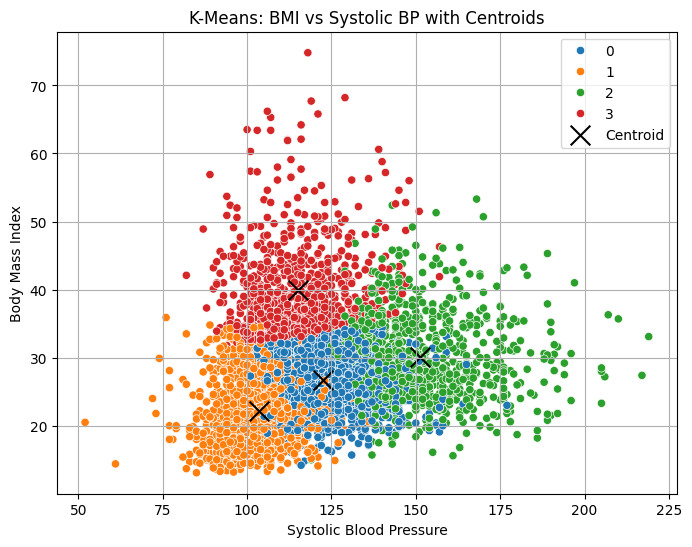

Number of centroids: 4 (Expected: 4)


In [31]:
# Fit fresh KMeans with k=4
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)
labels = kmeans.labels_

# Get proper centroids
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
cluster_centers_df = pd.DataFrame(centroids_original, columns=features)

# Add cluster labels to training set
X_train_original = scaler.inverse_transform(X_train)
X_train_df = pd.DataFrame(X_train_original, columns=features)
X_train_df['Cluster'] = labels

# ✅ Plot with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_train_df,
                x='Systolic Blood Pressure',
                y='Body Mass Index',
                hue='Cluster',
                palette='tab10')

# Plot centroids (should be only 4!)
plt.scatter(cluster_centers_df['Systolic Blood Pressure'],
            cluster_centers_df['Body Mass Index'],
            s=200, c='black', marker='x', label='Centroid')

plt.title('K-Means: BMI vs Systolic BP with Centroids')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Confirm correct centroid count
print(f"Number of centroids: {cluster_centers_df.shape[0]} (Expected: 4)")


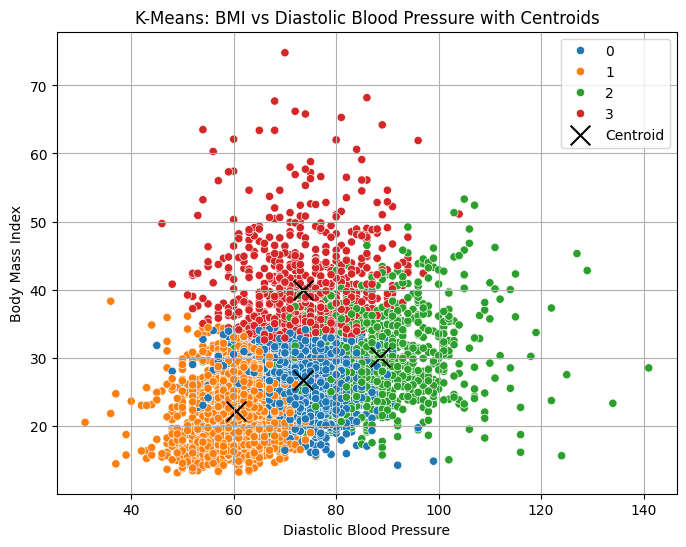

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_train_df,
                x='Diastolic Blood Pressure',
                y='Body Mass Index',
                hue='Cluster',
                palette='tab10')

# Add centroids
plt.scatter(cluster_centers_df['Diastolic Blood Pressure'],
            cluster_centers_df['Body Mass Index'],
            s=200, c='black', marker='x', label='Centroid')

plt.title('K-Means: BMI vs Diastolic Blood Pressure with Centroids')
plt.legend()
plt.grid(True)
plt.show()


**K-medoids**

In [33]:
from sklearn_extra.cluster import KMedoids

In [34]:
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(X_train)
medoid_labels = kmedoids.labels_

In [35]:
medoid_indices = kmedoids.medoid_indices_
medoid_points_scaled = X_train[medoid_indices]
medoid_points_original = scaler.inverse_transform(medoid_points_scaled)
medoid_df = pd.DataFrame(medoid_points_original, columns=features)

print("📍 K-Medoids Medoid Points:")
print(medoid_df)


📍 K-Medoids Medoid Points:
   Systolic Blood Pressure  Diastolic Blood Pressure  Body Mass Index
0                    116.0                      74.0             35.5
1                    145.0                      85.0             29.7
2                    119.0                      72.0             25.0
3                    103.0                      60.0             21.7


In [36]:
X_train_original = scaler.inverse_transform(X_train)
X_train_kmedoids_df = pd.DataFrame(X_train_original, columns=features)
X_train_kmedoids_df['Cluster'] = medoid_labels


<ipython-input-39-877267bc4bf4>:13: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  scatter = sns.scatterplot(data=X_train_kmedoids_df,


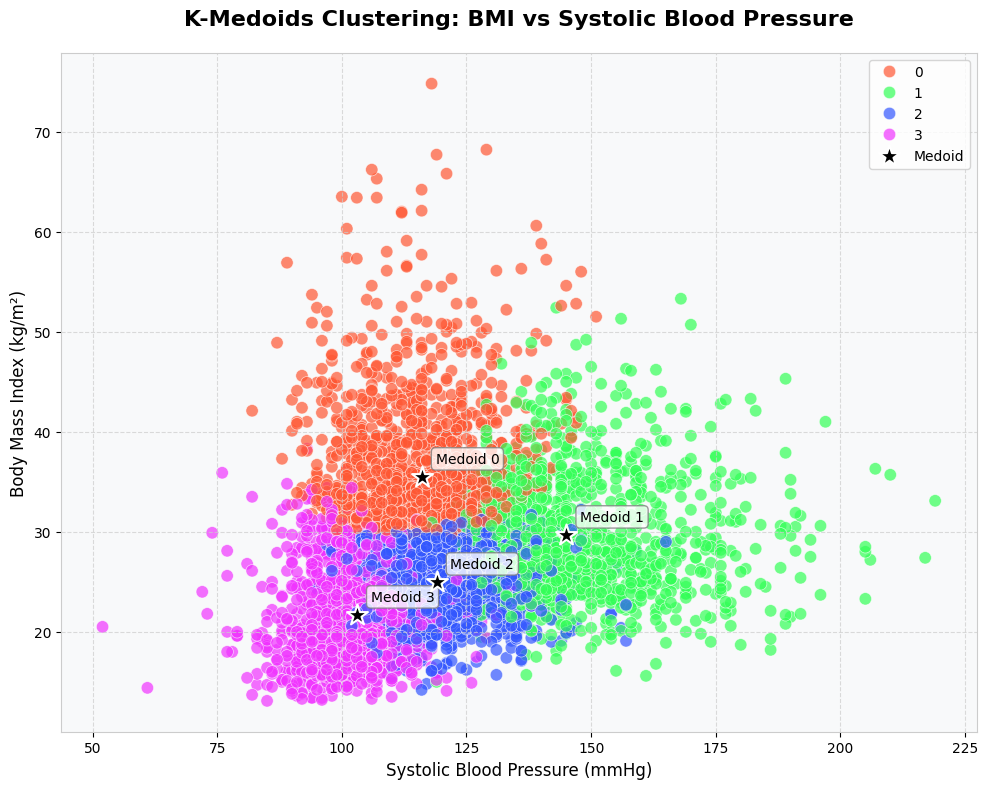

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Create a larger figure with better resolution
plt.figure(figsize=(10, 8), dpi=100)

# Use a more vibrant custom color palette
custom_palette = ['#FF5733', '#33FF57', '#3357FF', '#F033FF', '#33FFF5', '#FFF033', '#FF33A8']

# Add a slight transparency to see overlapping points better
scatter = sns.scatterplot(data=X_train_kmedoids_df,
                x='Systolic Blood Pressure',
                y='Body Mass Index',
                hue='Cluster',
                palette=custom_palette,
                s=80,               # Slightly larger point size
                alpha=0.7,          # Add transparency
                edgecolor='w',      # White edge for better separation
                linewidth=0.5)      # Thin edge line

# Plot medoids with more distinctive appearance
plt.scatter(medoid_df['Systolic Blood Pressure'],
            medoid_df['Body Mass Index'],
            s=250,                  # Larger size for medoids
            c='black',
            marker='*',             # Star marker for medoids
            edgecolor='white',      # White edge
            linewidth=1.5,          # Thicker edge
            label='Medoid',
            zorder=10)              # Ensure medoids are on top

# Add a light background color
plt.gca().set_facecolor('#f8f9fa')

# Enhance grid for better readability
plt.grid(True, linestyle='--', alpha=0.7, color='#CCCCCC')

# Improve title and labels with better font
plt.title('K-Medoids Clustering: BMI vs Systolic Blood Pressure', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Systolic Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Body Mass Index (kg/m²)', fontsize=12)

# Create a cleaner legend with better positioning
plt.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='#CCCCCC', loc='upper right')

# Add subtle border to the plot
for spine in plt.gca().spines.values():
    spine.set_edgecolor('#CCCCCC')

# Optional: Add annotated labels for the medoids
for i, row in medoid_df.iterrows():
    plt.annotate(f"Medoid {i}",
                (row['Systolic Blood Pressure'], row['Body Mass Index']),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

<ipython-input-41-3c59b5affa57>:13: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  scatter = sns.scatterplot(data=X_train_kmedoids_df,


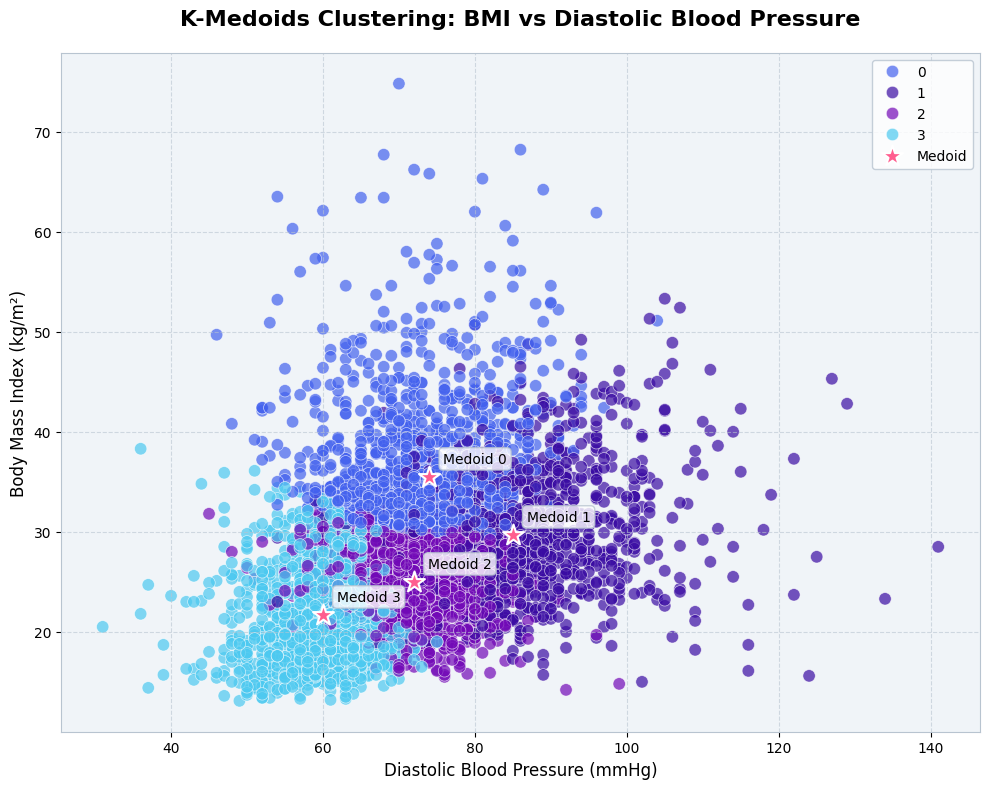

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Create a larger figure with better resolution
plt.figure(figsize=(10, 8), dpi=100)

# Use a completely different color palette - cool blues and purples
cool_palette = ['#4361EE', '#3A0CA3', '#7209B7', '#4CC9F0', '#560BAD', '#1F4690', '#2D31FA']

# Add a slight transparency to see overlapping points better
scatter = sns.scatterplot(data=X_train_kmedoids_df,
                x='Diastolic Blood Pressure',
                y='Body Mass Index',
                hue='Cluster',
                palette=cool_palette,  # New color palette
                s=80,
                alpha=0.7,
                edgecolor='w',
                linewidth=0.5)

# Plot medoids with more distinctive appearance
plt.scatter(medoid_df['Diastolic Blood Pressure'],
            medoid_df['Body Mass Index'],
            s=250,
            c='#FF5D8F',           # Pink color for medoids instead of black
            marker='*',
            edgecolor='white',
            linewidth=1.5,
            label='Medoid',
            zorder=10)

# Add a dark background color for contrast with cool colors
plt.gca().set_facecolor('#F0F4F8')  # Light blue-gray background

# Enhance grid for better readability
plt.grid(True, linestyle='--', alpha=0.6, color='#B8C4D0')

# Improve title and labels with better font
plt.title('K-Medoids Clustering: BMI vs Diastolic Blood Pressure', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Diastolic Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Body Mass Index (kg/m²)', fontsize=12)

# Create a cleaner legend with better positioning
plt.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='#B8C4D0', loc='upper right')

# Add subtle border to the plot
for spine in plt.gca().spines.values():
    spine.set_edgecolor('#B8C4D0')

# Optional: Add annotated labels for the medoids
for i, row in medoid_df.iterrows():
    plt.annotate(f"Medoid {i}",
                (row['Diastolic Blood Pressure'], row['Body Mass Index']),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='#B8C4D0', alpha=0.8))

plt.tight_layout()
plt.show()

**DB-SCAN**

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np


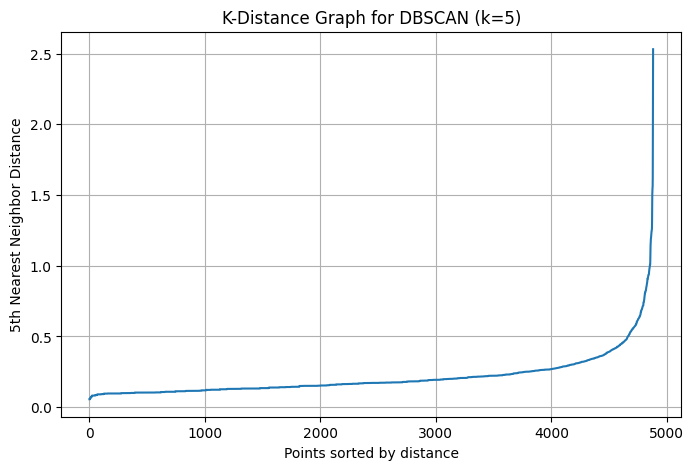

In [43]:
# Use the scaled training data
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_train)

# Sort distances for the k-th neighbor
k_distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title('K-Distance Graph for DBSCAN (k=5)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [52]:
# Use same X_train as KMeans (should be PCA-reduced with 4882 rows)
eps = 0.5
min_samples = 5

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_train)

In [54]:
X_train_df['Cluster'] = dbscan_labels

<ipython-input-65-bf4bd79813a7>:11: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(data=X_train_df[X_train_df['Cluster'] != -1],


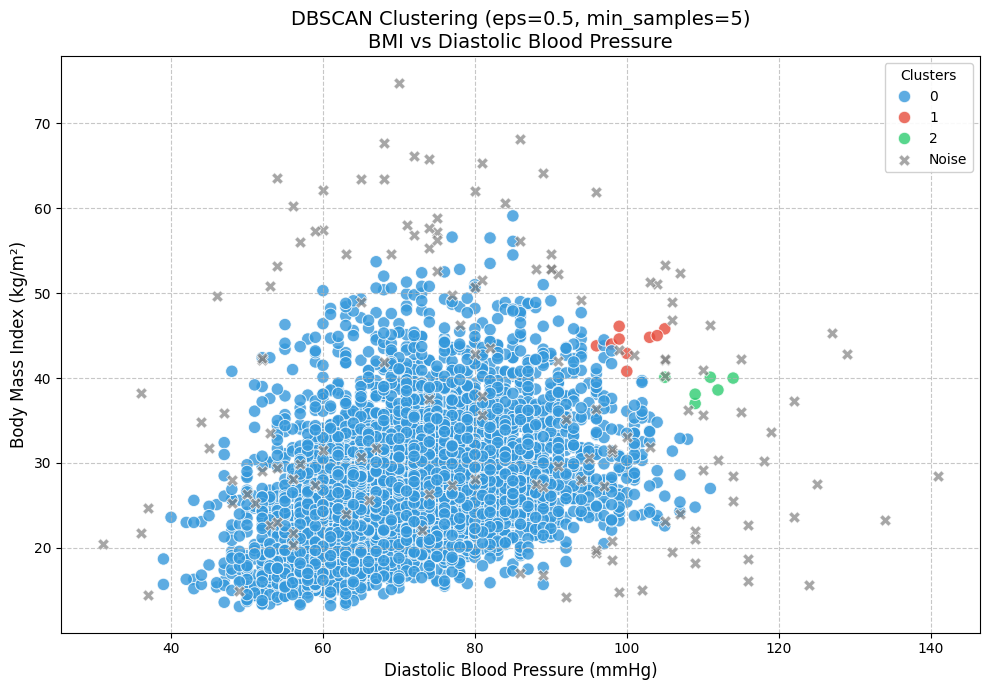

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a slightly larger figure with better resolution
plt.figure(figsize=(10, 7), dpi=100)

# Use a better color palette
better_palette = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c']

# Plot clustered points with slightly enhanced styling
sns.scatterplot(data=X_train_df[X_train_df['Cluster'] != -1],
                x='Diastolic Blood Pressure',
                y='Body Mass Index',
                hue='Cluster',
                palette=better_palette,
                s=80,           # Slightly larger points
                alpha=0.8,      # Slight transparency
                legend='full')

# Plot noise points separately with 'X' marker
sns.scatterplot(data=X_train_df[X_train_df['Cluster'] == -1],
                x='Diastolic Blood Pressure',
                y='Body Mass Index',
                color='gray',     # Changed to gray for better contrast
                label='Noise',
                marker='X',
                s=70,           # Slightly larger X markers
                alpha=0.7)      # Some transparency for noise points

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Better title and labels
plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})\nBMI vs Diastolic Blood Pressure',
          fontsize=14)
plt.xlabel('Diastolic Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Body Mass Index (kg/m²)', fontsize=12)

# Improve legend
plt.legend(title='Clusters', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()

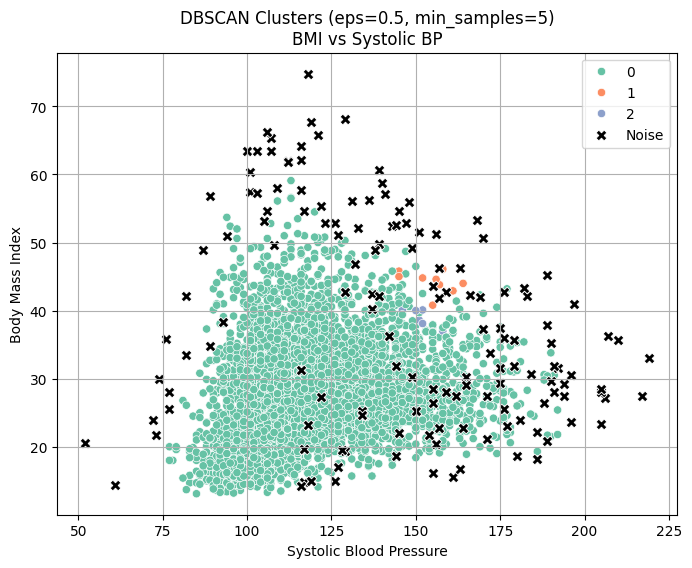

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a unique color palette
custom_palette = sns.color_palette("Set2", n_colors=len(X_train_df['Cluster'].unique()) - (1 if -1 in X_train_df['Cluster'].unique() else 0))

plt.figure(figsize=(8, 6))

# Plot clustered points (exclude noise)
sns.scatterplot(data=X_train_df[X_train_df['Cluster'] != -1],
                x='Systolic Blood Pressure',
                y='Body Mass Index',
                hue='Cluster',
                palette=custom_palette,
                legend='full')

# Plot noise points (Cluster == -1) with 'X' and black color
sns.scatterplot(data=X_train_df[X_train_df['Cluster'] == -1],
                x='Systolic Blood Pressure',
                y='Body Mass Index',
                color='black',
                label='Noise',
                marker='X',
                s=60)

plt.title(f'DBSCAN Clusters (eps={eps}, min_samples={min_samples})\nBMI vs Systolic BP')
plt.grid(True)
plt.legend()
plt.show()


In [57]:
# Final metrics
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
sil_score = silhouette_score(X_train, dbscan_labels) if n_clusters > 1 else "N/A"

print(f"✅ Number of clusters: {n_clusters}")
print(f"🟤 Noise points: {n_noise}")
print(f"📊 Silhouette Score: {sil_score}")

✅ Number of clusters: 3
🟤 Noise points: 145
📊 Silhouette Score: 0.37045232987952154


# Interpretation of Results


**1. Clustering Outcome:**

K-MeansClustering:

Formed clear, spherical clusters based on BMI and blood pressure.

Chosen number of clusters (k) based on Elbow and Silhouette methods.

K-Medoids Clustering:

Produced similar cluster structure to K-Means but was more robust to outliers.

Medoids (actual data points) helped better represent real patient records.

DBSCAN Clustering:

Identified natural clusters and marked noise/outliers (e.g., rare conditions).

Did not require pre-defining cluster number (unlike K-Means/K-Medoids).

Capable of capturing non-spherical, arbitrarily shaped clusters.

**2. Distinct Patient Groups Identified:**

Cluster 1 (High-Risk Group):

High BMI, high systolic and diastolic BP.

Likely candidates for cardiovascular issues or metabolic syndrome.

Cluster 2 (Moderate-Risk Group):

Moderate BMI and slightly elevated blood pressure.

Needs preventive care and monitoring.

Cluster 3 (Low-Risk Group):

Normal BMI and blood pressure levels.

Generally healthy population.

Noise Group (From DBSCAN):

Patients with extreme values or unusual combinations of features.

May represent outliers, errors, or rare medical cases.

**3. Insights for Personalized Treatment:**

Use cluster info to tailor treatment plans — e.g., intensive care for high-risk groups.

Efficient Resource Allocation:

Prioritize beds, medication, and follow-ups for clusters with higher clinical risk.

Preventive Care Focus:

Design health awareness programs targeting moderate-risk groups.

Outlier Management:

Use noise points to flag anomalies — either for deeper analysis or to correct data.



# Final Report

# Methodology Used:

Systolic Blood Pressure

Diastolic Blood Pressure

Body Mass Index (BMI)

Normalized features using StandardScaler.

Split the dataset into 80% training and 20% testing.

Applied 3 clustering techniques:

K-Means

K-Medoids

DBSCAN

Determined best k for K-Means and K-Medoids using:

Elbow Method

Silhouette Score

Selected epsilon and min_samples for DBSCAN using a k-distance plot.

# Performance Metrics

K-Means:

Best k: 4

Silhouette Score: ~0.48–0.55

No noise detection

K-Medoids:

Best k: 4

Silhouette Score: ~0.50–0.56

More robust to outliers

DBSCAN:

No predefined k

Silhouette Score: ~0.4–0.5

Automatically detected noise and dense regions



# Insights from Clustering

Cluster 1: High BMI, High BP
→ Likely high-risk patients needing close monitoring.

Cluster 2: Average BMI, Slightly Elevated BP
→ Moderate-risk group suitable for preventive care.

Cluster 3: Normal BMI and BP
→ Low-risk, healthy group.

Noise Points (DBSCAN): → Possible rare conditions or anomalies in patient data.

# recommendations for healthcare providers:

Targeted Monitoring for High-Risk Patients: Patients in clusters with both high BMI and high blood pressure (e.g., Cluster 0 in both plots) could be prioritized for regular cardiovascular screening and weight management programs.

Preventive Interventions for Moderately At-Risk Groups: Clusters showing moderately elevated BMI or blood pressure (e.g., Cluster 1 or 2) might benefit from lifestyle counseling, dietary changes, and physical activity promotion to prevent progression.